# **Sports Image Classification**
In this project, we will build different models to accurately classify images of 100 different sports, we will use different deep learning techniques such as:
1. Artificial Neural Networks or ANNs -> contains one or many of artificial neurons also called units, the series of these layers constitutes to the ANN architecture that can be used to classify or predict different outputs.
2. Convolutional Neural Networks or CNNs -> extended version of ANNs which primarily used in computer vision tasks such as image classification, object detection etc. CNNs consists of multiple layers like convolutional layers, pooling layer, fully connected layer.
3. Transfer Learning -> deep learning technique in which a pre-trained model is re-used on a related task by re-training the latter layers of the model.

In [185]:
# import essential libraries and modules
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import random
import seaborn as sns
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [14]:
sports_name = os.listdir("/kaggle/input/sports-classification/train")
sports_dict = {} # dict to store all labels with images
count_dict = {} # dict to store the number of train images
for name in sports_name:
    file_path = glob.glob(f'/kaggle/input/sports-classification/train/{name}/*')
    count = len(file_path)
    image_path = random.choice(file_path)
    sports_dict[name] = tf.keras.utils.load_img(image_path)
    count_dict[name] = count

# Exploratory Data Analysis

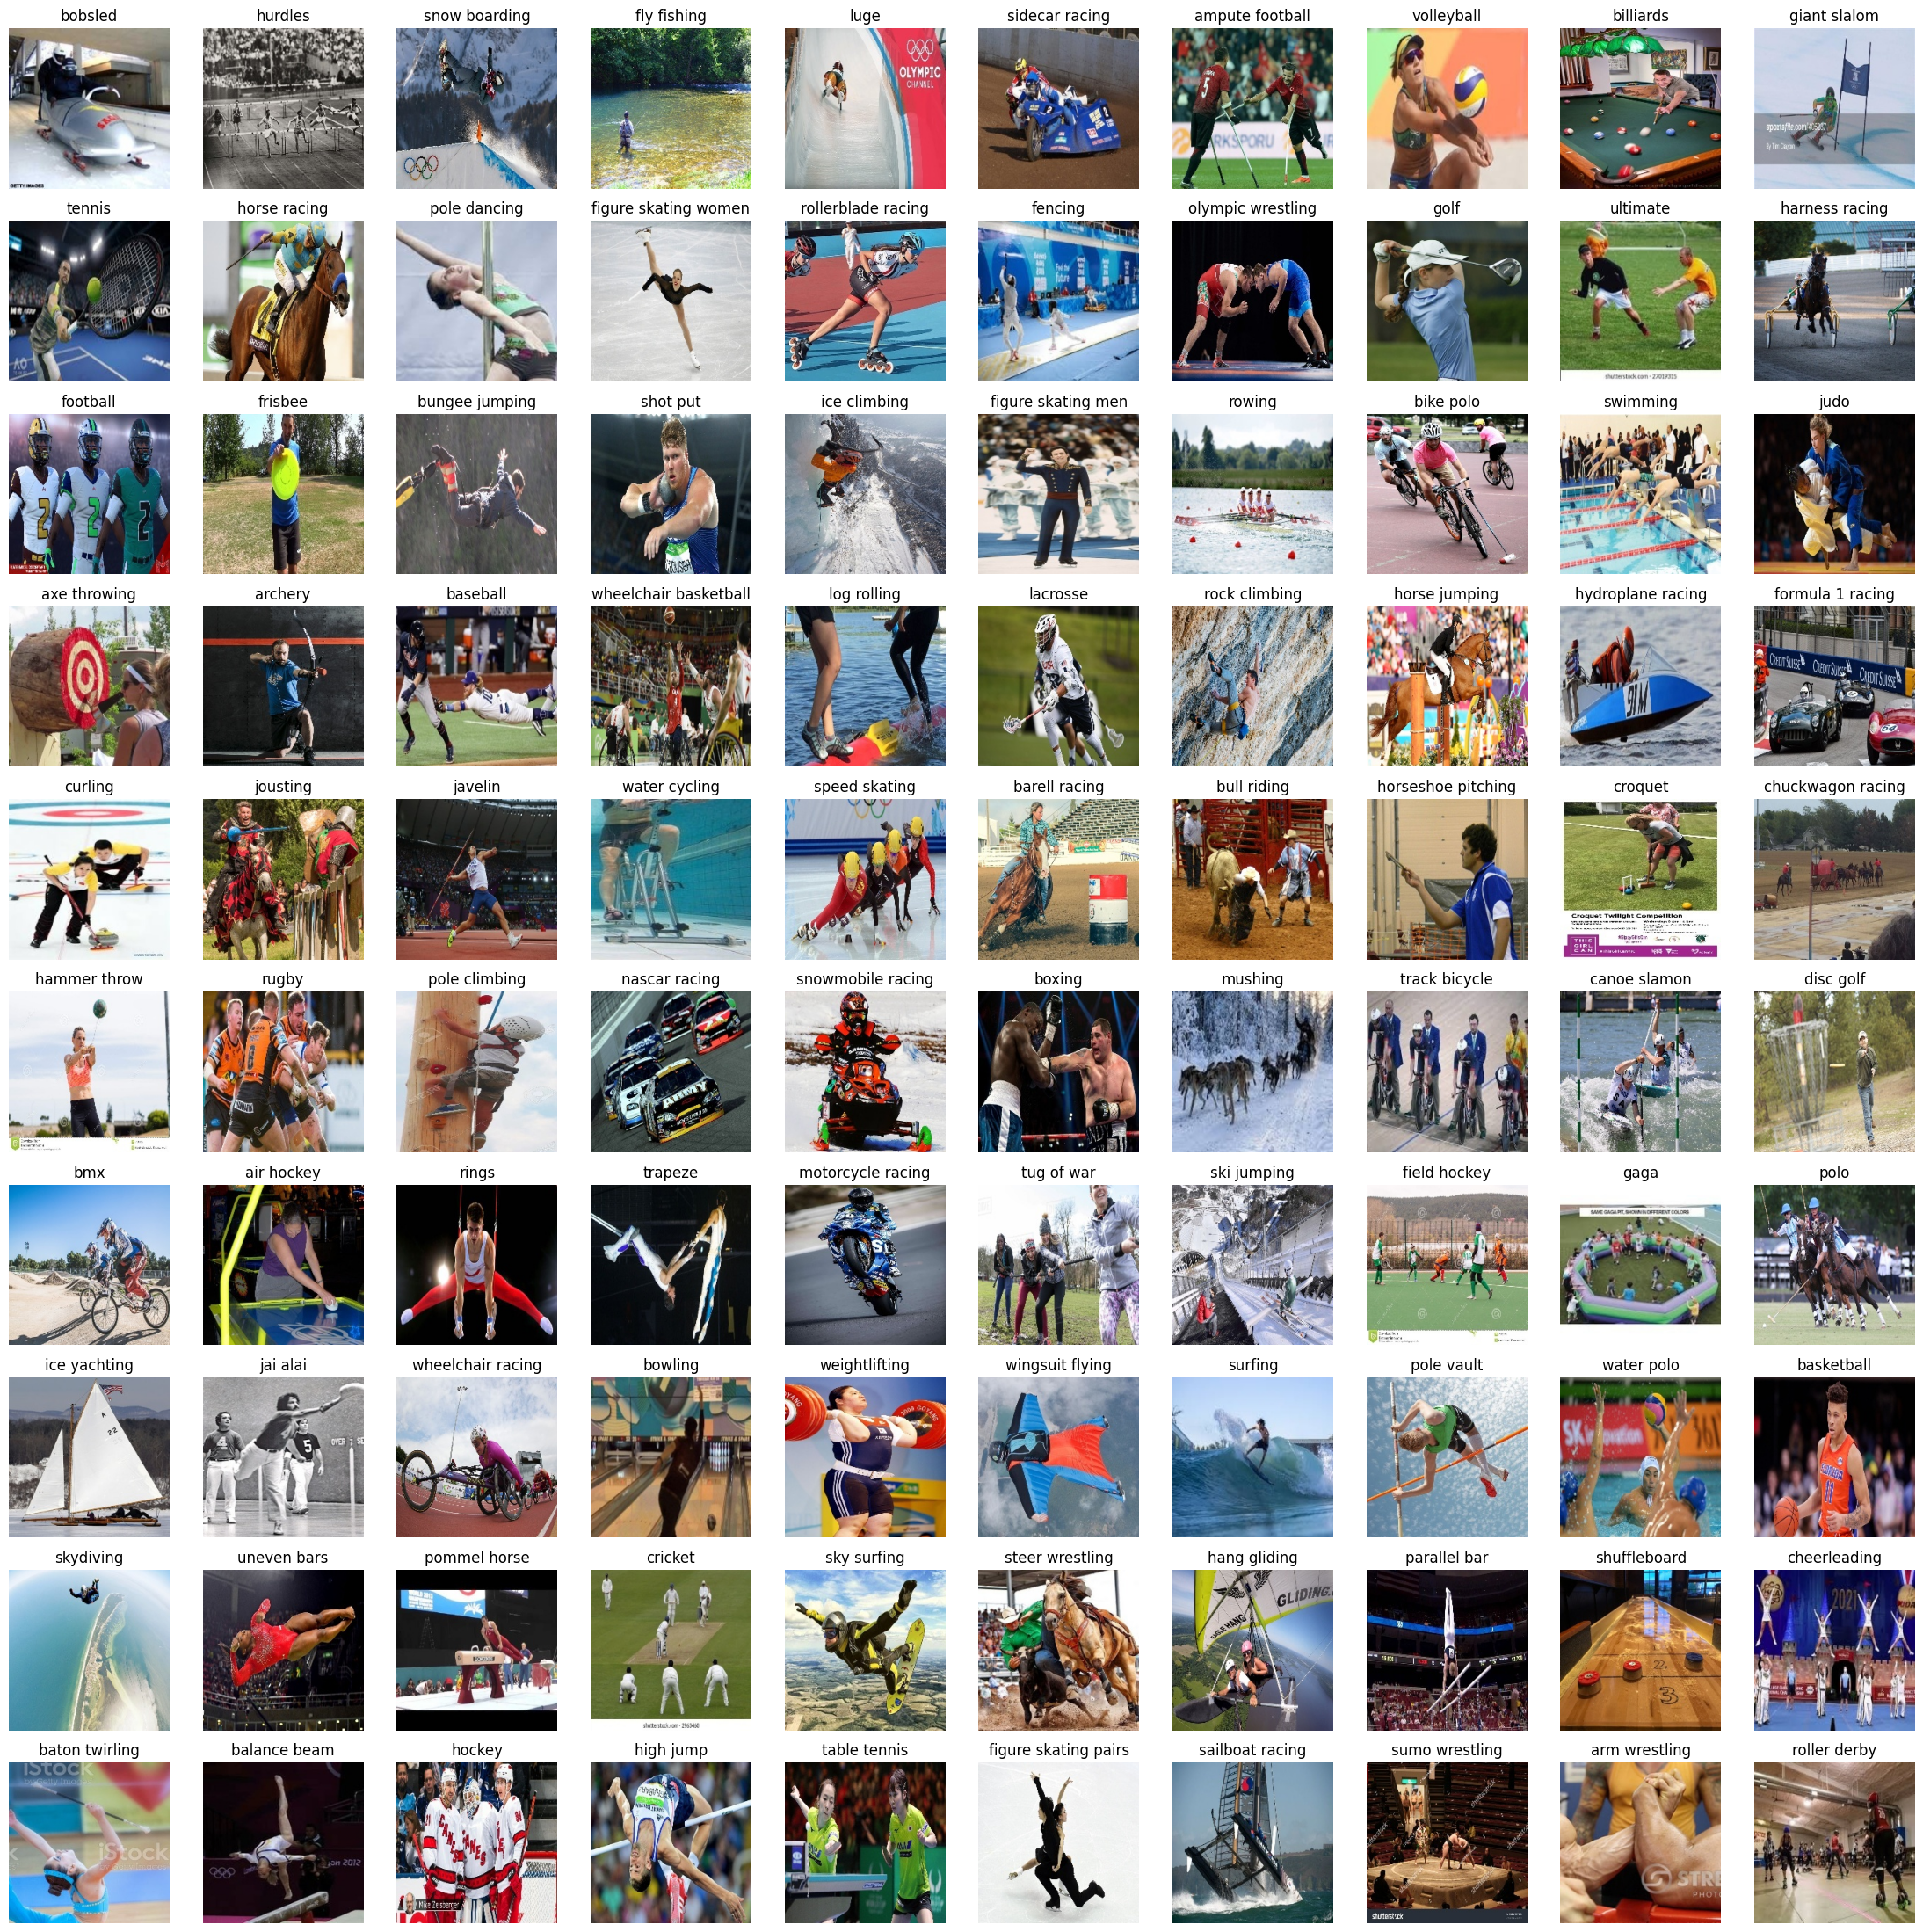

In [11]:
plt.figure(figsize=(28,28))
for i,(name,image) in enumerate(sports_dict.items()):
    plt.subplot(10,10,i+1)
    plt.imshow(image)
    plt.title(f'{name}')
    plt.axis('off')

In [16]:
train_count_df = pd.DataFrame({
    "class" : count_dict.keys(),
    "count" : count_dict.values()
})
print("Count of Number of train samples per sport")
train_count_df

Count of Number of train samples per sport


class  count
0                bobsled    138
1                hurdles    136
2          snow boarding    117
3            fly fishing    134
4                   luge    127
..                   ...    ...
95  figure skating pairs    151
96       sailboat racing    144
97        sumo wrestling    133
98         arm wrestling     99
99          roller derby    163

[100 rows x 2 columns]

# Load the dataset

In [151]:
# will use in-built keras.image_dataset_from_directory
# training data
train_data = tf.keras.utils.image_dataset_from_directory("../input/sports-classification/train",shuffle=True)
# test data
test_data = tf.keras.utils.image_dataset_from_directory("/kaggle/input/sports-classification/test",shuffle=False)
# validation data
val_data = tf.keras.utils.image_dataset_from_directory("/kaggle/input/sports-classification/valid",shuffle=False)

Found 13492 files belonging to 100 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


# Data Preprocessing

In [23]:
# preprocess the data with resizing and rescaling
height,width = 224,224
data_preprocess = keras.Sequential([
    keras.layers.Resizing(height,width), # shape resizing
    keras.layers.Rescaling(1.0/255.0) # scaling values 
])
# perform data preprocess on train test val data
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))

# Training a Simple Neural Network
Training on a simple artificial neural network or ANN

In [29]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(height,width,3)),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(100,activation='softmax')
])
ann_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 1024)              154141696 
                                                                 
 dense_4 (Dense)             (None, 256)               262400    
                                                                 
 dense_5 (Dense)             (None, 100)               25700     
                                                                 
Total params: 154429796 (589.10 MB)
Trainable params: 154429796 (589.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


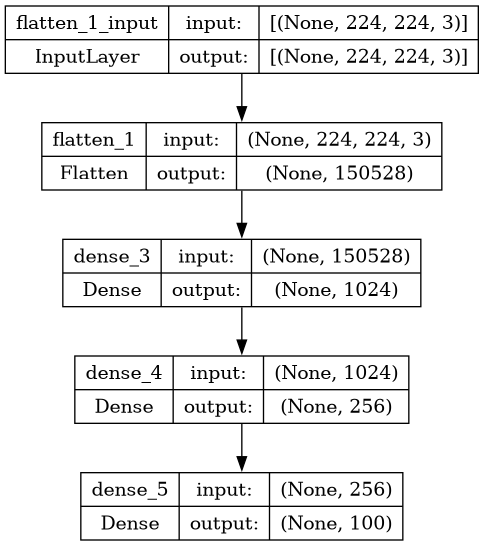

In [30]:
tf.keras.utils.plot_model(ann_model,show_shapes=True)

In [31]:
ann_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics='accuracy')

In [32]:
ann_model_history = ann_model.fit(train_ds,validation_data=val_ds,epochs=25)

Epoch 1/25
422/422 [==============================] - 49s 101ms/step - loss: 10.1707 - accuracy: 0.0116 - val_loss: 4.6056 - val_accuracy: 0.0100
Epoch 2/25
422/422 [==============================] - 16s 38ms/step - loss: 4.6004 - accuracy: 0.0128 - val_loss: 4.6067 - val_accuracy: 0.0100
Epoch 3/25
422/422 [==============================] - 16s 37ms/step - loss: 4.5979 - accuracy: 0.0135 - val_loss: 4.6080 - val_accuracy: 0.0100
Epoch 4/25
422/422 [==============================] - 16s 38ms/step - loss: 4.5963 - accuracy: 0.0135 - val_loss: 4.6095 - val_accuracy: 0.0100
Epoch 5/25
422/422 [==============================] - 16s 38ms/step - loss: 4.5952 - accuracy: 0.0129 - val_loss: 4.6109 - val_accuracy: 0.0100
Epoch 6/25
422/422 [==============================] - 16s 38ms/step - loss: 4.5945 - accuracy: 0.0127 - val_loss: 4.6121 - val_accuracy: 0.0100
Epoch 7/25
422/422 [==============================] - 16s 37ms/step - loss: 4.5940 - accuracy: 0.0128 - val_loss: 4.6133 - val_accurac

In [193]:
# print test results 
ann_test = ann_model.evaluate(test_ds)
ann_accuracy = ann_test[1]*100
print("Test Accuracy: ",ann_accuracy,"%")
print("Test Loss: ", ann_test[0])

16/16 [==============================] - 0s 27ms/step - loss: 4.6184 - accuracy: 0.0100
Test Accuracy:  0.9999999776482582 %
Test Loss:  4.618389129638672


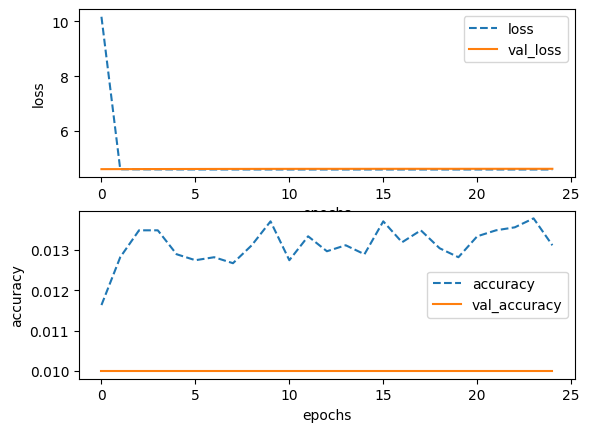

In [59]:
# visualize loss and accuracy
plt.subplot(2,1,1)

plt.plot(ann_model_history.history["loss"],ls='dashed')
plt.plot(ann_model_history.history["val_loss"])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss',"val_loss"])
plt.subplot(2,1,2)

plt.plot(ann_model_history.history["accuracy"],ls='dashed')
plt.plot(ann_model_history.history["val_accuracy"])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy',"val_accuracy"])


# Training a Convolution Neural Network


In [95]:
cnn_model_1 = keras.Sequential([
    
        keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation='relu', input_shape=(height, width, 3)),
        keras.layers.MaxPooling2D(),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.25),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(512,activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(units=100, activation='softmax')
]
)
cnn_model_1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_44 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_16 (Ba  (None, 224, 224, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 112, 112, 32)      18464     
                                                                 
 conv2d_46 (Conv2D)          (None, 112, 112, 32)    

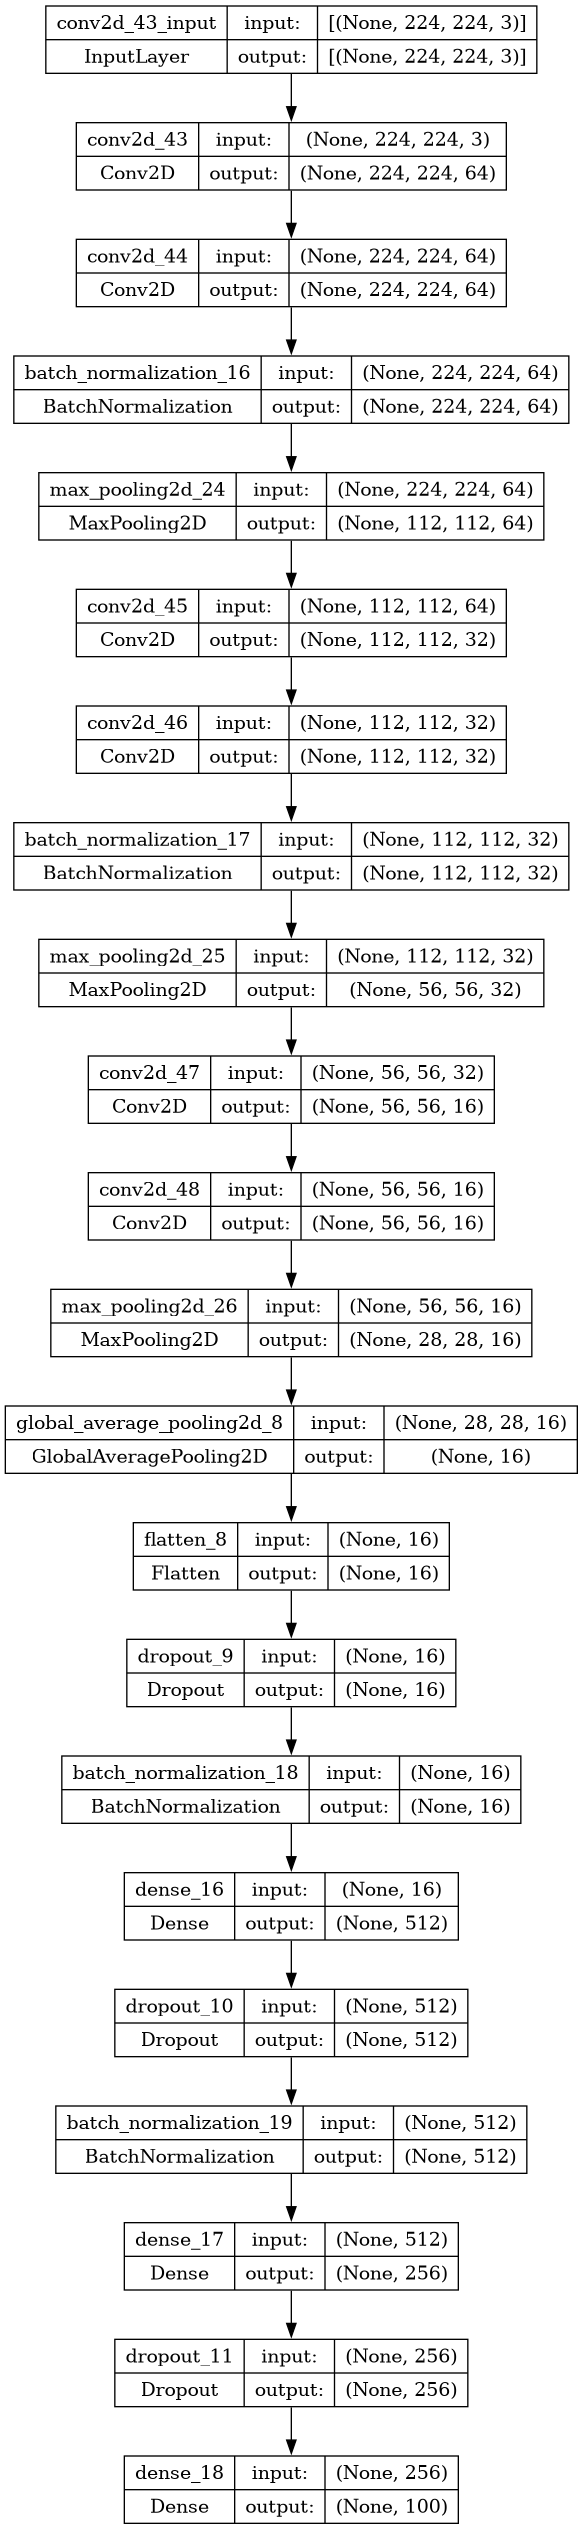

In [96]:
tf.keras.utils.plot_model(cnn_model_1,show_shapes=True)

In [97]:
cnn_model_1.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

mddel_cnn_1_history = cnn_model_1.fit(train_ds,validation_data=val_ds,epochs=25,batch_size=32,verbose=1)

Epoch 1/25
422/422 [==============================] - 72s 160ms/step - loss: 4.5353 - accuracy: 0.0379 - val_loss: 4.1032 - val_accuracy: 0.0460
Epoch 2/25
422/422 [==============================] - 67s 159ms/step - loss: 4.1239 - accuracy: 0.0663 - val_loss: 5.3411 - val_accuracy: 0.0280
Epoch 3/25
422/422 [==============================] - 68s 160ms/step - loss: 3.9198 - accuracy: 0.0885 - val_loss: 4.3316 - val_accuracy: 0.0700
Epoch 4/25
422/422 [==============================] - 68s 160ms/step - loss: 3.7867 - accuracy: 0.1072 - val_loss: 4.8793 - val_accuracy: 0.0320
Epoch 5/25
422/422 [==============================] - 68s 160ms/step - loss: 3.6972 - accuracy: 0.1135 - val_loss: 3.3977 - val_accuracy: 0.1720
Epoch 6/25
422/422 [==============================] - 68s 160ms/step - loss: 3.6052 - accuracy: 0.1244 - val_loss: 3.1675 - val_accuracy: 0.2140
Epoch 7/25
422/422 [==============================] - 68s 160ms/step - loss: 3.5302 - accuracy: 0.1368 - val_loss: 3.4150 - val_ac

In [98]:
# print test results 
cnn_test = cnn_model_1.evaluate(test_ds)
cnn_accuracy = cnn_test[1]*100
print("Test Accuracy: ",cnn_accuracy,"%")
print("Test Loss: ", cnn_test[0])

16/16 [==============================] - 1s 46ms/step - loss: 2.8247 - accuracy: 0.2540
Test Accuracy:  25.40000081062317 %
Test Loss:  2.824671745300293


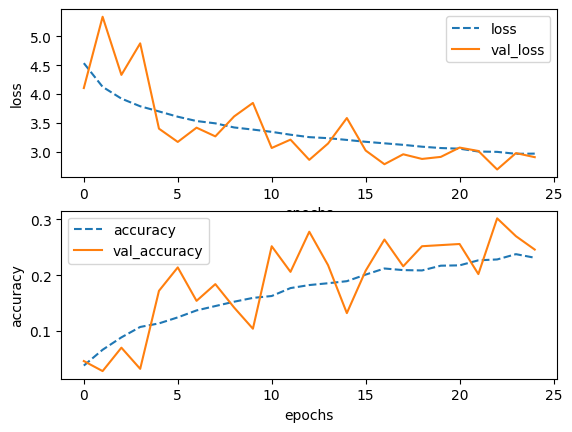

In [99]:
# visualize loss and accuracy
plt.subplot(2,1,1)

plt.plot(mddel_cnn_1_history.history["loss"],ls='dashed')
plt.plot(mddel_cnn_1_history.history["val_loss"])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss',"val_loss"])
plt.subplot(2,1,2)

plt.plot(mddel_cnn_1_history.history["accuracy"],ls='dashed')
plt.plot(mddel_cnn_1_history.history["val_accuracy"])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy',"val_accuracy"])

# Transfer Learning
Using ResNet50

In [180]:
# download the model
model_location = "/kaggle/input/resnet-50/tensorflow2/classification/1"
base_model = hub.KerasLayer(model_location,input_shape=(224,224,3),trainable=False)

In [181]:
# make the model with the base model
resnet_model = keras.Sequential([
    base_model,
    keras.layers.Dense(100,activation='softmax')
])

resnet_model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              25612201  
                                                                 
 dense_33 (Dense)            (None, 100)               100200    
                                                                 
Total params: 25712401 (98.09 MB)
Trainable params: 100200 (391.41 KB)
Non-trainable params: 25612201 (97.70 MB)
_________________________________________________________________


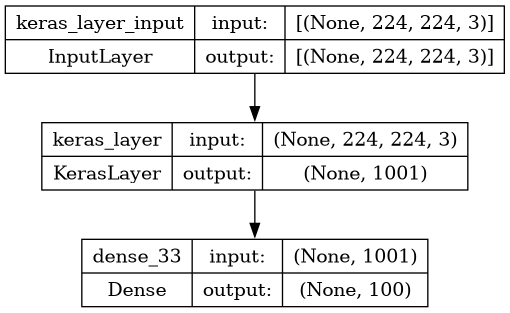

In [182]:
tf.keras.utils.plot_model(resnet_model,show_shapes=True)

In [184]:
resnet_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

model_history = resnet_model.fit(train_ds,validation_data=val_ds,epochs=25)

Epoch 1/25
422/422 [==============================] - 53s 109ms/step - loss: 4.4723 - accuracy: 0.2432 - val_loss: 4.3362 - val_accuracy: 0.3700
Epoch 2/25
422/422 [==============================] - 45s 106ms/step - loss: 4.2133 - accuracy: 0.4165 - val_loss: 4.0890 - val_accuracy: 0.4100
Epoch 3/25
422/422 [==============================] - 45s 105ms/step - loss: 3.9726 - accuracy: 0.4524 - val_loss: 3.8573 - val_accuracy: 0.4240
Epoch 4/25
422/422 [==============================] - 45s 105ms/step - loss: 3.7478 - accuracy: 0.4658 - val_loss: 3.6407 - val_accuracy: 0.4440
Epoch 5/25
422/422 [==============================] - 45s 105ms/step - loss: 3.5385 - accuracy: 0.4784 - val_loss: 3.4387 - val_accuracy: 0.4560
Epoch 6/25
422/422 [==============================] - 45s 105ms/step - loss: 3.3446 - accuracy: 0.4875 - val_loss: 3.2520 - val_accuracy: 0.4620
Epoch 7/25
422/422 [==============================] - 45s 105ms/step - loss: 3.1665 - accuracy: 0.4967 - val_loss: 3.0807 - val_ac

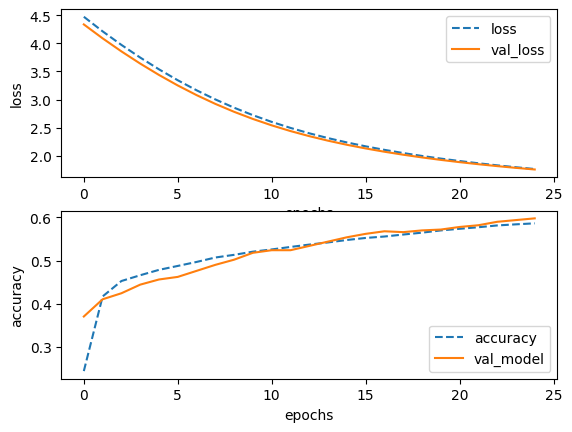

In [189]:
# visualize loss and accuracy
plt.subplot(2,1,1)

plt.plot(model_history.history["loss"],ls='dashed')
plt.plot(model_history.history["val_loss"])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss',"val_loss"])
plt.subplot(2,1,2)

plt.plot(model_history.history["accuracy"],ls='dashed')
plt.plot(model_history.history["val_accuracy"])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy',"val_model"])

In [191]:
# print accuracy and loss
model_test = resnet_model.evaluate(test_ds)
model_accuracy = model_test[1]*100
print("Test Accuracy: ",model_accuracy,"%")
print("Test Loss: ", model_test[0])

16/16 [==============================] - 2s 96ms/step - loss: 1.6842 - accuracy: 0.5740
Test Accuracy:  57.40000009536743 %
Test Loss:  1.684200644493103


# Visualize Results and accuracy


In [192]:
result_dict = {
    "model" : ['ANN',"CNN","Resnet50"],
    "accuracy": [ann_accuracy,cnn_accuracy,model_accuracy]
}
result_df = pd.DataFrame(result_dict)
result_df

model   accuracy
0       ANN   1.000000
1       CNN  25.400001
2  Resnet50  57.400000

<Axes: title={'center': 'model vs accuracy'}, xlabel='model'>

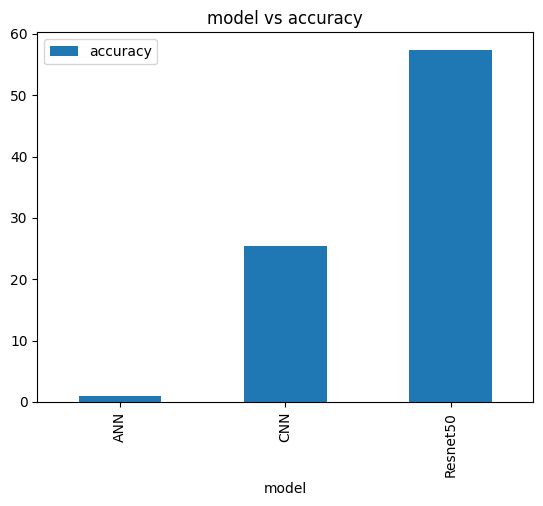

In [196]:
# plot the results 
result_df.plot.bar(x='model',y='accuracy',title='model vs accuracy')